<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 9: Object oriented programming

In this Notebook, we learn what Object Oriented Programming (OOP) is, what Classes are and how to write our own, and we learn how to make graphs using OOP and and the `matplotlib` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A Triangle Class
So far, we have learned what is called *functional* programming. In functional programming you write or use functions that manipulate data. For example, consider the case where we have to deal with a number of triangles. For each triangle we want to be able to compute its area, and we want to be able to plot it, and fill the inside with a color. Say we have an arbitrary number of $N$ triangles. For each triangle we need to store the $(x,y)$ values of its three corner points. So we create arrays for the $x$ values of each corner point, we create arrays for the $y$ values of each corner point. Then we write a function that computes the area of a triangle given its three corners, and we write a function that plots the triangle given the three corner points and color to fill the triangle, and finally we need to loop through all the corner points. This all sounds like a bit of work, but it is tracktable. It already gets more complicated when we want to change the corner point of one triangle. We have to know its place in the array, and change the correct corner point.

It gets even more complicated when we have to deal with both triangles and rectangles. Triangles have three corner points, while rectangles have four corner points. The function to compute the area of a rectangle is very different, hence we have to make sure we call the area function for a triangle when we have a triangle, and the area function for a rectangle when we have a rectangle. The plotting is not much different, but we have to supply it four corner points rather than three. This gets a bit messier already. Wouldn't it be nice if it was possible to organize the data and functions in such a way that the data itself knows how to compute its area or how to plot itself? That may sound magical, but that is exactly what Object Oriented Programming does. 

Object oriented programming is, in essence, just another way of organizing your data and functions. Rather than defining and storing them separately, the data and functions are stored and bound together in what is called a *Class*. The data that are stored are called *attributes*, and the functions are called *methods*. 
This is probably easiest understood by writing a class and using it. Consider, for example, the class `Triangle` that stores the coordinates of the three corner points. Don't worry about the syntax yet (we will get back to that). Run the code below so we can start using the class. 

In [2]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2

Now that the `Triangle` class is defined, we can start creating triangles. We can call the `Triangle` class just like a function and we need to provide it tuples of the three corner points. The `Triangle` class returns what is called an object. An object is an instance of a class. Note also, that when you type 

`Triangle(` 

and hit [shift][tab], a small box pops up showing what input arguments are expected (you don't need to provide the `self` argument; more on that later). Let's create a triangle with corners (0,1), (3,0) and (2,3).

In [3]:
t1 = Triangle((0,1), (3,0), (2,3))

`t1` is now an instance of the class `Triangle`. We simply say that `t1` is a triangle. We have stored the three corner points of the triangle. Hence, each `Triangle` object has three attributes. You can find out what attributes an object has by typing 

`t1.` 

(don't forget the dot) and then hit the [TAB] key. The attributes can be accessed with the *dot syntax*.

In [4]:
print(t1)  # not very useful
print(t1.x0y0)  # first corner point
print(t1.x1y1)  # second corner point
print(t1.x2y2)  # third corner point

(0, 1)
(3, 0)
(2, 3)


Let's get back to the `Triangle` class. When we call the `Triangle` class (official lingo: we create a `Triangle` object, or more officially yet: we create an instance of the `Triangle` class), Python calls the `__init__` function. This function is called the *constructor*. It constructs an object. In the constructor you define what arguments need to be provided to create a triangle. The name `__init__` (that is *two* underscores before and after the word `init`) is required (it is one of the few unfortunate name choices of the Python language). The first argument is `self` and tells Python what the object itself is called inside the class. 

We saw above that typing `print t1` returns a meaningless message. This can be resolved by including a representation function, which needs to be called `__repr__`. This function is called when the object is printed (or converted to a string).

In [5]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
    def __repr__(self):
        return 'Triangle with corners:' + str(self.x0y0) + str(self.x1y1) + str(self.x2y2)
t1 = Triangle((0,1), (3,0), (2,3))
print(t1)

Triangle with corners:(0, 1)(3, 0)(2, 3)


In the Triangle class, the three corner points are stored as three tuples. Hence, the $x$ value of the first corner point is `self.x0y0[0]` and the $y$ value is `self.x0y0[1]`. It may be useful to store one array of the three $x$ values of the three corner points and one array of the three $y$ values of the corner points. If those are stored, it is fairly easy to compute the area $A$ of a triangle using the following formula

$A = \frac{1}{2}|(x_0-x_2)(y_1-y_0) - (x_0-x_1)(y_2-y_0)|$

Let's modify the `Triangle` class to include these two additional attributes and an `area` function

In [6]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
    def __repr__(self):
        return 'Triangle with corners:' + str(self.x0y0) + str(self.x1y1) + str(self.x2y2)
    def area(self):
        A = 0.5 * np.abs((self.x[0] - self.x[2]) * (self.y[1] - self.y[0]) - 
                         (self.x[0] - self.x[1]) * (self.y[2] - self.y[0]))
        return A

Note that the `area` function gets passed the object `self`; once it knows what `self` is, it has access to all its attributes and functions. We can now create a `Triangle` object and compute its area as follows (don't forget to run the new `Triangle` class above first)

In [7]:
t1 = Triangle( (0,1), (3,0), (2,3) )
print(t1.area())

4.0


In the code above, the `area` function is called using the *dot* syntax, where `self` in the function is automatically replaced with the variable before the dot (in this case `t1`). The *dot* syntax is short for the much longer

In [8]:
print(Triangle.area(t1))

4.0


Note that classes are very convenient, as the triangle object knows what its own corner points are. When typing `t1.`[TAB], not only all attributes but also all functions of an object are shown. Try it:

In [9]:
# type t1. and then a tab

Let's expand the `Triangle` class by adding a function that plots a filled triangle. The color of the triangle is supplied with a keyword argument in the constructor. Hence, when it is not provided, the default value will be used.

In [10]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2, color='b'):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
        self.color = color
    def __repr__(self):
        return 'Triangle with corners:' + str(self.x0y0) + str(self.x1y1) + str(self.x2y2)
    def area(self):
        A = 0.5 * np.abs((self.x[0]-self.x[2])*(self.y[1]-self.y[0]) - 
                         (self.x[0]-self.x[1])*(self.y[2]-self.y[0]))
        return A
    def plot(self):
        plt.fill(self.x, self.y, color=self.color)

Let's create three triangles and store them in a list. Then we loop through the triangles in the list and plot them in one graph. Note how we can loop through the triangles in the list `tlist`:

`for t in tlist:`

So every time we go through the loop, `t` is the next triangle in the list `tlist`.

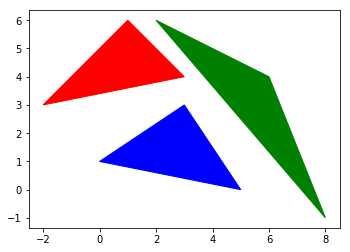

In [11]:
tlist = []  # start with an empty list
t1 = Triangle((0,1), (5,0), (3,3), 'b')
tlist.append(t1)  # add t1 to the list
t2 = Triangle((3,4), (1,6), (-2,3), 'r')
tlist.append(t2)
t3 = Triangle((8,-1), (6,4), (2,6), 'g')
tlist.append(t3)
plt.figure()
for t in tlist:
    t.plot()
plt.axis('scaled');

Similarly, the total area of the three triangles is

In [12]:
areatot = 0.0
for t in tlist:
    areatot += t.area()
print('total area:', areatot)

total area: 20.5


### Exercise 1. A Rectangle class
Create a `Rectangle` class for rectangles that stand straight up, so that the base is horizontal. Input arguments are the $(x,y)$ values of the lower-left-hand corner, the width of the base and the height. Class functions are: `area`, which returns the area of the rectangle and `plot`, which plots a filled rectangle using a transparancy of 0.5 (i.e., use keyword argument `alpha=0.5` in the `fill` function). Fill the rectangle with the color blue when the width of the rectangle is larger than the height, and fill it with the color red when the width is smaller than the height. Demonstrate that your `Rectangle` class works by plotting two rectangles, one with lower-left-hand corner (0, 0), width 10 and height 5, and the other with lower-left-hand corner (2, 0), width 4 and height 8.

In [13]:
class Rectangle:
    def __init__(self, x1, y1, base, height):
        self.x1 = x1
        self.y1 = y1
        self.base = base
        self.height = height
        self.x = np.array([self.x1, (self.x1 + self.base), (self.x1 + self.base), self.x1])
        self.y = np.array([self.y1, self.y1, (self.y1 + self.height), (self.y1 + self.height)])
    def plot(self):
        if (self.base/self.height) < 1:
            color = 'r'
        else:
            color = 'b'
        plt.fill(self.x, self.y, alpha = 0.5, color = color) 
    def area(self):
        A = self.base * self.height
        self.plot
        return A

50
32


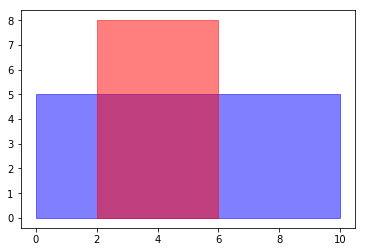

In [14]:
r1 = Rectangle(0, 0, 10, 5)
r2 = Rectangle(2, 0, 4, 8)
print(r1.area())
print(r2.area())
r1.plot()
r2.plot()

### Exercise 2. Many rectangles
Demonstrate that your `Rectangle` class works by loading the text file `rectangle_data.txt`. This file contains the $x$, $y$, width, and height for 20 rectangles. Compute and report the total area of all the rectangles in the file. Make a plot of the 20 rectangles to demonstrate that the colors are assigned correctly.

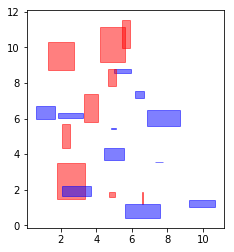

In [15]:
r = np.genfromtxt('rectangle_data.txt', delimiter=' ' )
rlist = []
z = 0

for j in range(len(r[:,0])):
    t = Rectangle(r[j,0], r[j,1], r[j,2], r[j,3])
    t.plot()
    plt.axis('scaled');

### Arrays are objects
Now that you have learned about OOP, you may realize that many of the Python features you use are actually based on OOP. For example, when you create an array, the array is an object. 

In [16]:
x = np.arange(12)
print('type of x:', type(x))

type of x: <class 'numpy.ndarray'>


Hence, an array has attributes and class methods associated with it. You can type `dir(x)` to find out all attributes and methods (there are many). Some of the attributes of an array include the number of dimensions and the shape. You can even change the shape (as long as you make sure the shape fits the array) by modifying the shape attribute.

In [17]:
print('number of dimensions of x:', x.ndim)
print('shape of x:', x.shape)
x.shape = (4, 3)
print('new shape of x:', x.shape)
print(x)

number of dimensions of x: 1
shape of x: (12,)
new shape of x: (4, 3)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


An array also has a number of functions, including a function that returns the mean value of the array or the maximum value of an array.

In [18]:
print('mean of x: ', x.mean())
print('max  of x:  ', x.max())

mean of x:  5.5
max  of x:   11


### Plotting features are objects
All plotting commands we have used so far are functions that are part of the `matplotlib` package. Not surpringly, `matplotlib` has an object-oriented design. Plots may be created by making use of the object-oriented structure. This requires a bit of additional typing, but in the end, we gain additional flexibility and the ability to make animations.

Using the OO syntax, we first create a `figure` object and specify the size using the `figsize` keyword argument (the size of the figure is specified in inches), then we add an axis to the figure with the `add_axes` command (note that it is `axes` with an `e`) by specifying the *relative* location of the axis in the figure. The location of the left, bottom, width, and height are specified in relative coordinates (both the horizontal and vertical direction run from 0 to 1). To plot, we use the `plot` method of the axis.

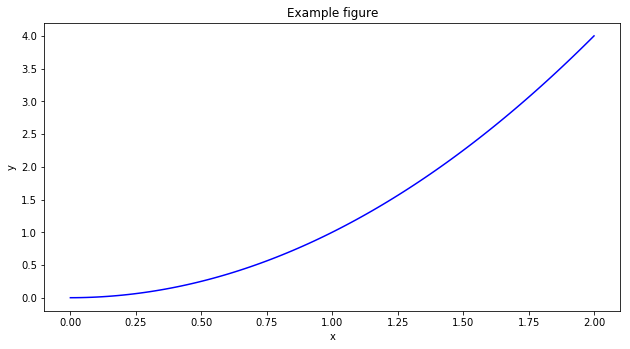

In [19]:
x = np.linspace(0, 2, 100)
y = x ** 2
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x, y, 'b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Example figure');

We can add as many axes to the figure as we want and decide exactly where each axis is located. 

In [20]:
ax2 = fig.add_axes([0.15,0.5,0.4,0.3])
ax2.plot(x,-y,'r')
ax2.set_title('Second axis');

### Matplotlib patches
The plotting package `matplotlib` includes a set of classes to define shapes, which are called *patches* in `matplotlib`. There are patches for many different shapes including circles, ellipses, polygons, wedges, and arrows. Here we learn how to draw these patches. We learn how to make them move interactively in a future notebook.

The process for adding a patch to a graph is always the same. First you create an axis, then you create a patch object and you add the patch object to the axis. Each patch object has a few input arguments and a number of keyword arguments. The keyword arguments include: `ec` for edge color, `fc` for face color, `alpha` for transparancy, and `zorder` for the order in which they are plotted (the patch with the highest `zorder` value lies on top). The names of all patch classes start with a capital: `Circle`, `Ellipse`, `Polygon`, `Wedge`, `Arrow`. You need to import these classes from `matplotlib.patches` to be able to use them. Use the help system to learn about the required input arguments. The graph below contains two circles, where the smaller one is on top of the larger one. The background color of the graph is set to the same color as the small circle (using the `fc` (facecolor) keyword of the `add_axes` function), so that it looks like the large circle has a hole. The aspect ratio of the axis is set to `'equal'` when the axis is created. The `autoscale` function needs to be called to set the limits of the axis such that the patches fit exactly in the axis. Alternatively, you can call the `ax.set_xlim` and `ax.set_ylim` functions to select limits of your own choice.

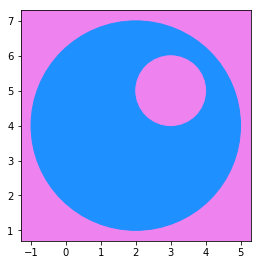

In [21]:
from matplotlib.patches import Circle
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8], fc='violet', aspect='equal')
small = Circle(xy=(3, 5), radius=1, fc='violet', ec='violet', zorder=2)
big = Circle(xy=(2, 4), radius=3, fc='dodgerblue', ec='dodgerblue', zorder=1)
ax.add_patch(small)
ax.add_patch(big)
ax.autoscale()

### Exercise 3. `Circle` patch
Create a plot with 20 circles with radius 0.2 using `Circle` pathes, with their centers equally spaced (in $x$) along the line $y=\sin(x)$ for $x$ going from 0 to $2\pi$.

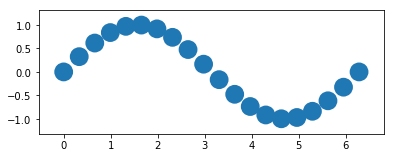

In [22]:
from matplotlib.patches import Circle
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
r = 0.2

fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8], aspect='equal')
for i in range(len(x)):
    c = Circle(xy=(x[i], y[i]), radius = r)
    ax.add_patch(c)
ax.autoscale()


### Exercise 4. `Arrow` patch
Create 20 arrows with width 0.2 using `Arrow` patches. The starting points of the arows are equally spaced (in $x$) along the line $y=\sin(x)$ for $x$ going from 0 to $2\pi$. The arrow is 0.2 long in $x$ direction (`dx=0.2`) and the length and sign in $y$ direction (`dy`) needs to be chosen such that the arrow is tangent to the line $y=\sin(x)$ at its starting point. (Hint: use the derivative of the line.)

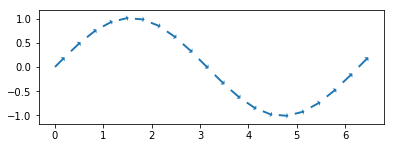

In [23]:
from matplotlib.patches import Arrow
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)
r = 0.2

fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8], aspect='equal')
for i in range(len(x)):
    c = Arrow(x[i], y[i], 0.2, np.cos(x[i])*0.2, width = 0.2 )
    ax.add_patch(c)
ax.autoscale()

### Exercise 5. Packing circles in a square
Consider trying to put as many non-overlapping circles as possible in a square area. All circles have the same radius. The highest packing density (relative area covered by the circles) is obtained by putting the circles in stacked rows as shown in the figure below, which has a packing density of 0.9069. For more information on circle packing, including circles with different radii, see [here](http://en.wikipedia.org/wiki/Circle_packing).
![packing](http://upload.wikimedia.org/wikipedia/commons/6/69/Circle_packing_%28hexagonal%29.svg)  

We are going to put circles in a square area by generating locations randomly. Put as many circles with radius 0.05 in a square with sides equal to 1 (lower left-hand corner $(x,y)=(0,0)$, upper right-hand corner $(x,y)=(1,1)$) by randomly generating centers of the circles with the `np.random.rand` function.

First, write a function called `overlap` that takes as input arguments two `Circle` patches and returns `True` when the circles overlap and `False` when they don't overlap. Each `Circle` patch has attributes `center` and `radius`. Note that a `Circle` patch stores its center as attribute `center`. Test your code with the following three circles:

    c1 = Circle(xy=(0, 0), radius=5)
    c2 = Circle(xy=(5, 0), radius=2)
    c3 = Circle(xy=(2, 5), radius=1)
    print 'overlap(c1, c2):', overlap(c1, c2)  # overlaps
    print 'overlap(c2, c3):', overlap(c2, c3)  # doesn't overlap
    print 'overlap(c1, c3):', overlap(c1, c3)  # overlaps


In [24]:
def overlap(c1, c2):
    A = None
    r1 = c1.radius
    r2 = c2.radius
    x1 = c1.center[0]
    x2 = c2.center[0]
    y1 = c1.center[1]
    y2 = c2.center[1] 
    if np.sqrt((x2-x1)**2 + (y2-y1)**2 ) < r1 + r2:
        A = True
    else:
        A = False
    return A

c1 = Circle(xy=(0, 0), radius=5)
c2 = Circle(xy=(5, 0), radius=2)
c3 = Circle(xy=(2, 5), radius=1)
print ('overlap(c1, c2):', overlap(c1, c2))  # overlaps
print ('overlap(c2, c3):', overlap(c2, c3))  # doesn't overlap
print ('overlap(c1, c3):', overlap(c1, c3))  # overlaps    

overlap(c1, c2): True
overlap(c2, c3): False
overlap(c1, c3): True


### Exercise 6. 
Create a list to store all circles that fit inside the unit square. Generate random locations of the circles with the `np.random.rand` function, which returns random values between 0 and 1. All circles have radius 0.05. Check whether a generated circle fits entirely inside the unit square. If it fits inside the square, use the `overlap` function that you wrote in the previous exercise to determine whether it overlaps with any of the circles in the list. If it doesn't overlap with any of the other circles, then add it to the list. Stop when you have generated 50 circles (it is very difficult to fit more non-overlapping circles inside the square with this procedure). Create a plot showing your 50 circles. 

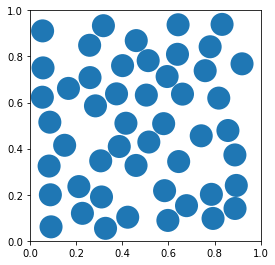

In [25]:
from matplotlib.patches import Circle
fig = plt.figure()
ax = fig.add_axes([.1, .1, .8, .8], aspect='equal')
clist = []
r = 0.05
clist.append(Circle(xy = (0.9 * np.random.rand(2,1) + 0.05), radius = r))

while len(clist) < 50:
    k = 0
    g = False
    z = Circle(xy = (0.9 * np.random.rand(2,1) + 0.05), radius = r)
    for i in range(len(clist)): 
        if overlap(clist[i], z) == True:
            g = True
            break
    if g == False:
        clist.append(z)
        ax.add_patch(z)